In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from scipy import stats

In [2]:
w1=pd.read_csv(r'D:\ALY6020\2\car.csv') #  read the file
w1.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [3]:
w1.info() #Check the type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [4]:
w1['Horsepower'].unique() # datapoints should be float, but displayed as str. Check all output 

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [5]:
w1=w1.replace(to_replace='?', value=np.NaN)  # replace ? to NaN
np.any(pd.isnull(w1))   #estimate exist of NaN
col_null= w1.isnull().sum(axis=0) # count all NaN data
col_null

w1.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
w1['Horsepower'] = w1['Horsepower'].astype('float')
w1['Horsepower'].fillna(w1['Horsepower'].mean(),inplace = True)# replace missing values with average values

col_null= w1.isnull().sum(axis=0) #count all NaN data again
col_null

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [7]:
x = w1.iloc[:,1:].copy()          
#x.drop(columns='Cylinders',inplace = True)       # stepwise feature selection
#x.drop(columns='Horsepower',inplace = True) 
#x.drop(columns='US Made',inplace = True)   
#x.drop(columns='Weight',inplace = True)  
#x.drop(columns='Acceleration',inplace = True) 
#x.drop(columns='Model Year',inplace = True) 
#x.drop(columns='Displacement',inplace = True)
x.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [8]:
y = w1['MPG'].copy()
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: MPG, dtype: float64

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1) # Split train_set and test_set
print('y table: ', len(y), ' x table: ', len(x),
     'x train and test: ', len(x_train), len(x_test))

y table:  398  x table:  398 x train and test:  318 80


In [10]:
X2 = sm.add_constant(x_train) # build Regression model
est = sm.OLS(y_train,X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     194.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.62e-109
Time:                        21:01:24   Log-Likelihood:                -839.93
No. Observations:                 318   AIC:                             1696.
Df Residuals:                     310   BIC:                             1726.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -19.7074      5.146     -3.830      0.000     -29.833      -9.582
Cylinders       -0.3037      0.381     -0.797      0.426      -1.053       0.446
Displacement     0.0232      0.009      2.624      0.009       0.006       0.041
Horsepower      -0.0170      0.014     -1.187      0.236      -0.045       0.011
Weight          -0.0070      0.001     -9.900      0.000      -0.008      -0.006
Acceleration     0.1109      0.107      1.038      0.300      -0.099       0.321
Model Year       0.8266      0.058     14.132      0.000       0.712       0.942
US Made         -2.7462      0.558     -4.922      0.000      -3.844      -1.648
==============================================================================
Omnibus:                       13.056   Durbin-Watson:                   2.226
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.542
Skew:                           0.381   Prob(JB):                     0.000422
Kurtosis:                       3.769   Cond. No.                     8.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Part 2: First, judging from the p values, we have significant features "displacement" "weight" "model year" and "US made" with p-values smaller than .05. Displacement incresed by 1, MPG will increase by 0.0232; Weight increased by 1, MPG will decrease by 0.0070; model year increased by 1, MPG will increase by 0.8266; If the car is US made, the MPG decrease by 2.7462.

Therefore, the biggest contributors are origin(specifically if the origin is US) and model year.

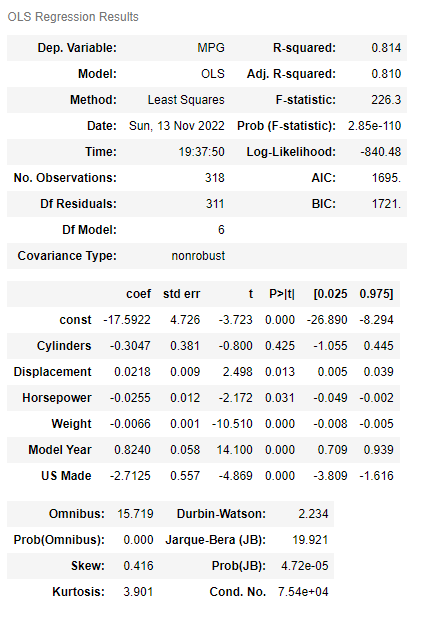


Part 3: 
Using stepwise feature selection, first we locatemodel, horsepower and US made as originate variables(tested and checked as well). By adding other features step by step, acceleration turns out to be not contributing to the R-sqaured of the model. 
After the selection processs, although there is no obvious increase in R-squared value itself, the p-value of horse power changed. The optimized model successfully predict the contribution to MPG of horsepower: with every 1 increase in horsepower, there will be 0.0255 decrease in MPG. The selection optimazation added an important predictive feature for our model. 

The feature with highest contribution to MPG is origin of US, with the highest coefficient, followed by model year, horse power, displacement and weight. To use the model, the manufacturer could find out which variables are highly connected with MPG, and if they have a specific target market that with higher/lower MPG preferences, they can use those coefficients to control the MPG to cater their preferences. 
